# Adm No: 2222291
# Name: Toh Kien Yu

# Background Research

### I will be forecasting Gas, Electricity and Water Consumption for this project.<br><br>1. Forecasting gas consumption is essential for setting up and running of a sustainable system.<br><br>2. Forecasting electricity is important is crucial as it serves as a foundation to make decisions in power sector planning.<br><br>3. Forecasting water consumption is also important to ensure people do not face service interruptions are able to maintain an affordable rate while being dependable.<br><br>Overall, forecasting allows us to better plan and make decisions when managing our resource. 

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Data Loading

### Date is set to index

In [2]:
df = pd.read_csv('dataset/Energy Consumption Dataset.csv')
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%Y')
df.set_index('DATE', inplace=True)
df.head()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4

# Data Exploration

In [3]:
print('Dataset Shape')
print(df.shape)

Dataset Shape
(397, 3)


In [4]:
df.describe()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
count              397.000000                     397.000000   
mean                23.785139                     888.472544   
std                  4.903452                     153.877594   
min                 11.600000                     553.200000   
25%                 20.200000                     771.100000   
50%                 23.500000                     897.800000   
75%                 27.900000                    1005.200000   
max                 46.000000                    1294.000000   

       Water Consumption (tons)  
count                397.000000  
mean                 484.953652  
std                  133.908863  
min                   44.400000  
25%                  384.400000  
50%                  487.400000  
75%                  580.200000  
max                  811.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1990-01-01 to 2023-01-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB


## No Null Values

In [6]:
# No Null Values
df.isnull().sum()

Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64

# Data Visulization

In [10]:
dfWithoutYr2023 = df[df.index.year != 2023]
yearlyGasMean = dfWithoutYr2023.resample('Y')['Gas Consumption (tons)'].mean()
yearlyElectricityMean = dfWithoutYr2023.resample('Y')['Electricity Consumption (MWh)'].mean()
yearlyWaterMean = dfWithoutYr2023.resample('Y')['Water Consumption (tons)'].mean()

## Gas Consumption (tons) Trend

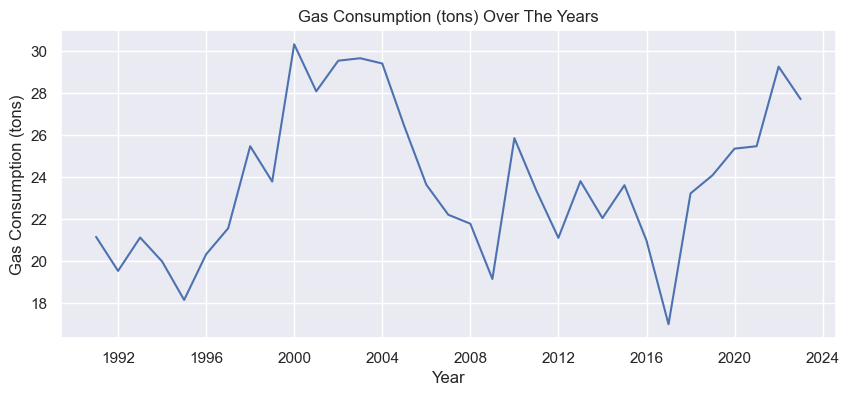

In [11]:
plt.figure(figsize = (10,4))
plt.plot(yearlyGasMean)
plt.title('Gas Consumption (tons) Over The Years')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (tons)')
plt.show()

### There is an increase of about 7 tons of gas consumption over the years with fluctuations occurring during this period.

## Electricity Consumption (MWh) Trend

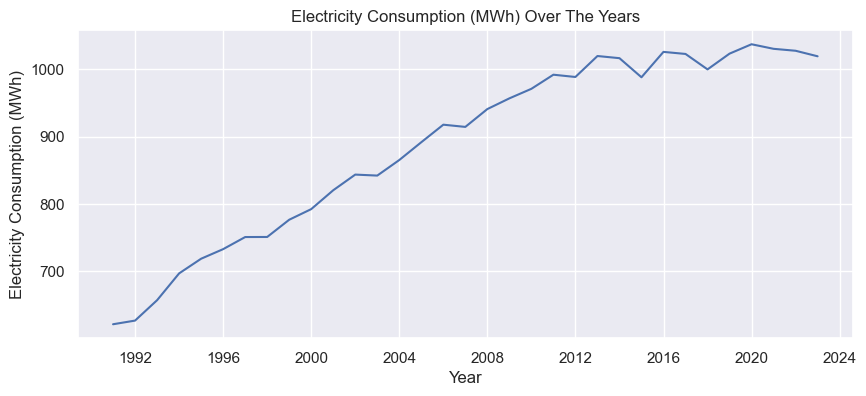

In [12]:
plt.figure(figsize = (10,4))
plt.plot(yearlyElectricityMean)
plt.title('Electricity Consumption (MWh) Over The Years')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (MWh)')
plt.show()

### Electricity Consumption has been increasing over the years which can be possibly attributed to the global population increase.

## Water Consumption (tons) Trend

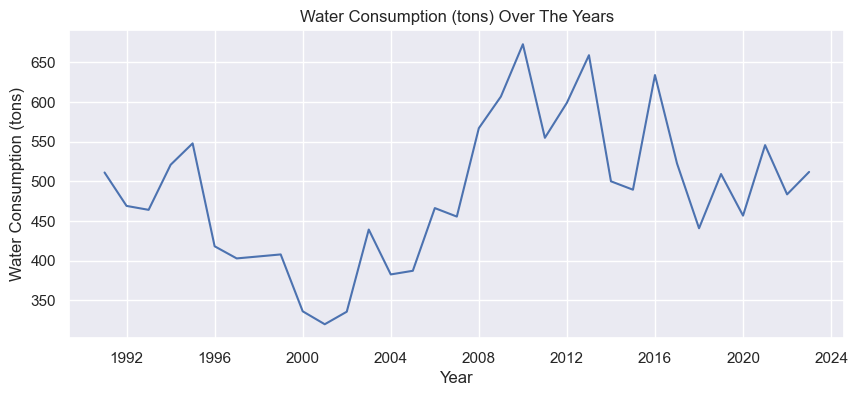

In [13]:
plt.figure(figsize = (10,4))
plt.plot(yearlyWaterMean)
plt.title('Water Consumption (tons) Over The Years')
plt.xlabel('Year')
plt.ylabel('Water Consumption (tons)')
plt.show()

### While there is a general fall in water consumption, fluctuations occurred greatly where water consumption peaked at 675 tons in 2010.

## Gas, Electricity and Water Consumption's Monthly Mean Over The Years

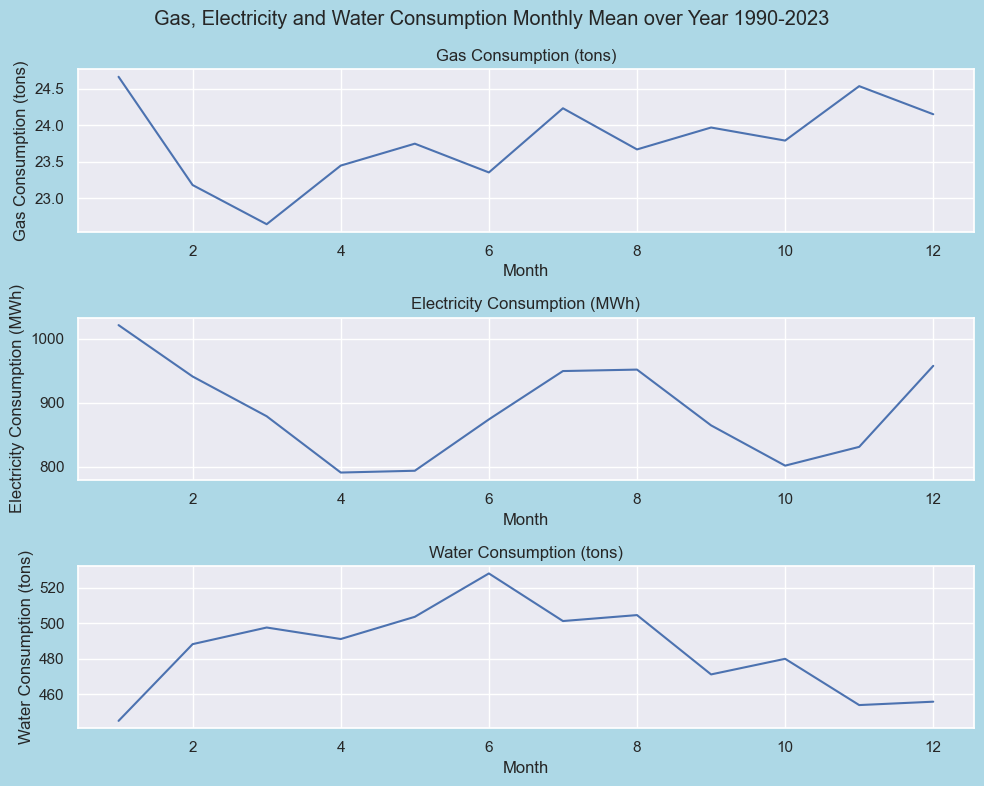

In [14]:
# Monthly mean of gas/electricity/water consumption
peakGas = df.groupby(df.index.month)[['Gas Consumption (tons)']].mean()
peakElectricity = df.groupby(df.index.month)[['Electricity Consumption (MWh)']].mean()
peakWater = df.groupby(df.index.month)[['Water Consumption (tons)']].mean()

fig = plt.figure(figsize=(10,8))
fig.set_facecolor('lightblue')
ax = fig.add_subplot(311)
plt.suptitle('Gas, Electricity and Water Consumption Monthly Mean over Year 1990-2023')
plt.plot(peakGas)
plt.title('Gas Consumption (tons)')
plt.xlabel('Month')
plt.ylabel('Gas Consumption (tons)')

ax2 = fig.add_subplot(312)
plt.plot(peakElectricity)
plt.title('Electricity Consumption (MWh)')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (MWh)')

ax3 = fig.add_subplot(313)
plt.plot(peakWater)
plt.title('Water Consumption (tons)')
plt.xlabel('Month')
plt.ylabel('Water Consumption (tons)')
plt.tight_layout()
plt.show()

### From the graph above,<br><br>1. Gas Consumption and Electricity Consumption tend to peak in January<br><br>2. Water Consumption is highest in June

## Gas, Electricity and Water consumption in recent years 2021 and 2022

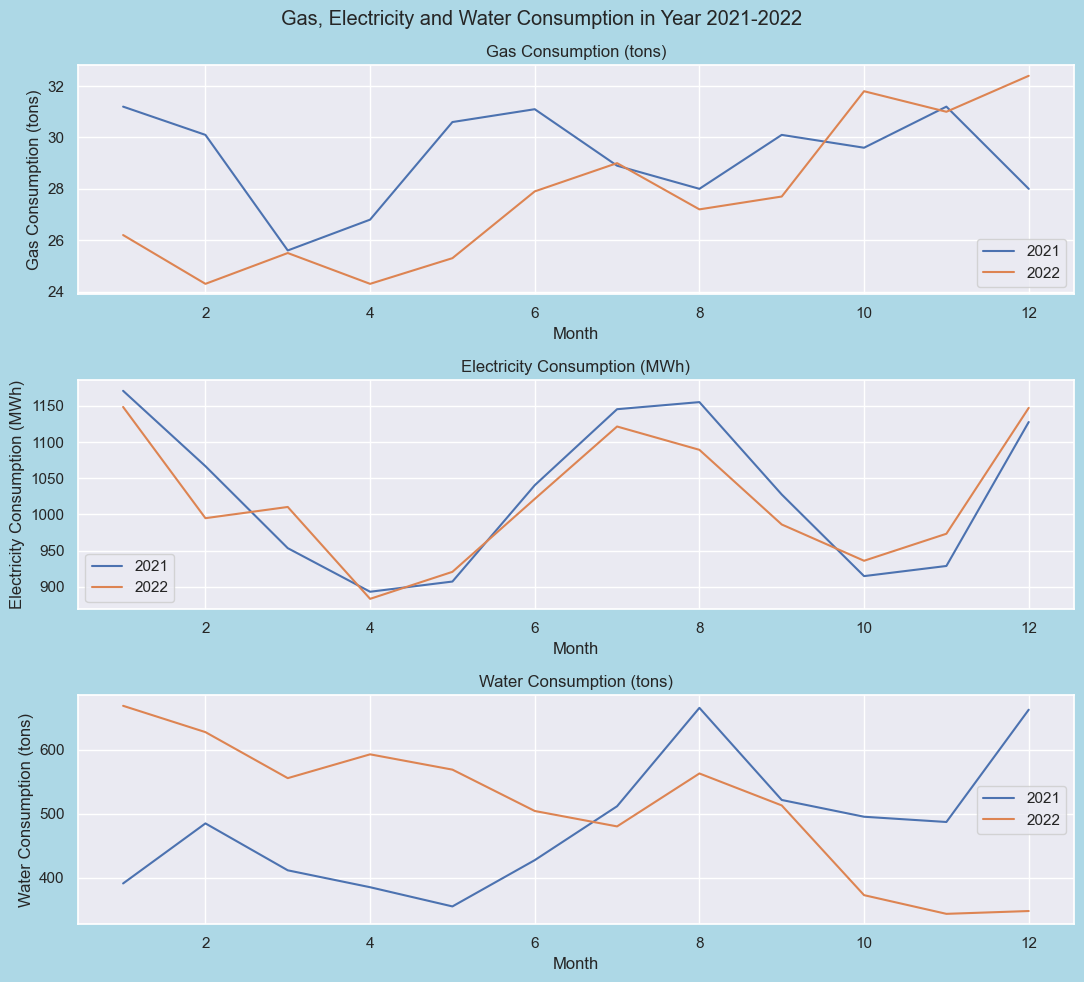

In [15]:
#Gas,Electricity and Water consumption in recent years 2021 and 2022
year2021 = df[(df.index.year == 2021)]
year2022 = df[(df.index.year == 2022)]

fig = plt.figure(figsize=(11,10))
fig.set_facecolor('lightblue')
ax = fig.add_subplot(311)
plt.suptitle('Gas, Electricity and Water Consumption in Year 2021-2022')
plt.plot(year2021.index.month,year2021['Gas Consumption (tons)'],label='2021')
plt.plot(year2022.index.month,year2022['Gas Consumption (tons)'],label='2022')
plt.title('Gas Consumption (tons)')
plt.xlabel('Month')
plt.ylabel('Gas Consumption (tons)')
plt.legend()
ax2 = fig.add_subplot(312)
plt.plot(year2021.index.month,year2021['Electricity Consumption (MWh)'],label='2021')
plt.plot(year2022.index.month,year2022['Electricity Consumption (MWh)'],label='2022')
plt.title('Electricity Consumption (MWh)')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
ax3 = fig.add_subplot(313)
plt.plot(year2021.index.month,year2021['Water Consumption (tons)'],label='2021')
plt.plot(year2022.index.month,year2022['Water Consumption (tons)'],label='2022')
plt.title('Water Consumption (tons)')
plt.xlabel('Month')
plt.ylabel('Water Consumption (tons)')
plt.legend()
plt.tight_layout()
plt.show()

### From the graph above, it provides data in recent years 2021 and 2022. Electricity and Water Consumption usually peaks in August.

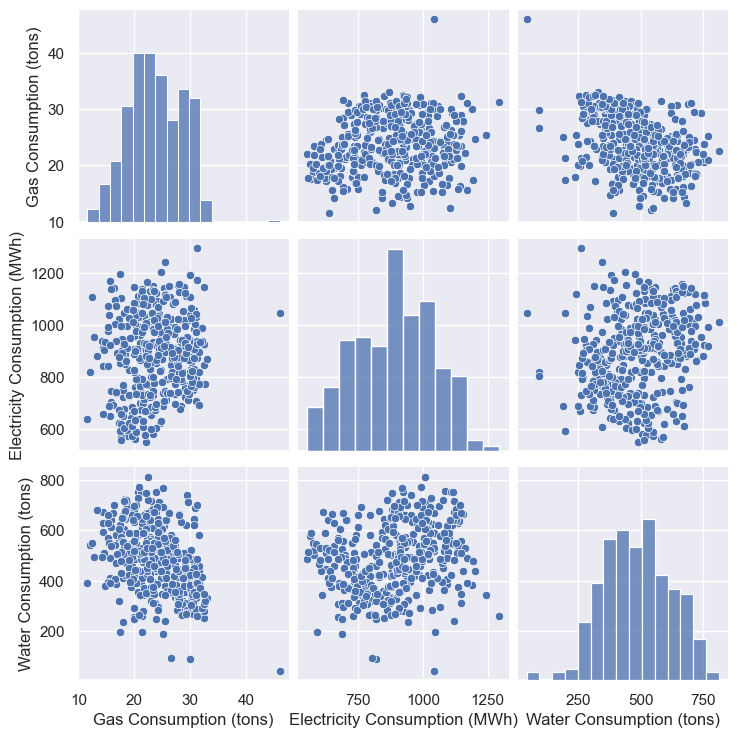

In [84]:
sns.pairplot(df)

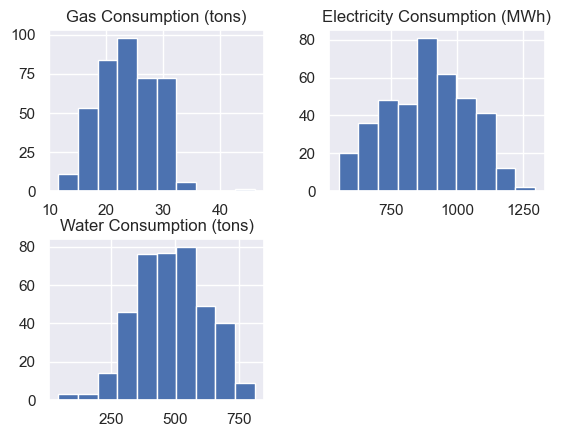

In [85]:
df.hist()
plt.show()

<Axes: >

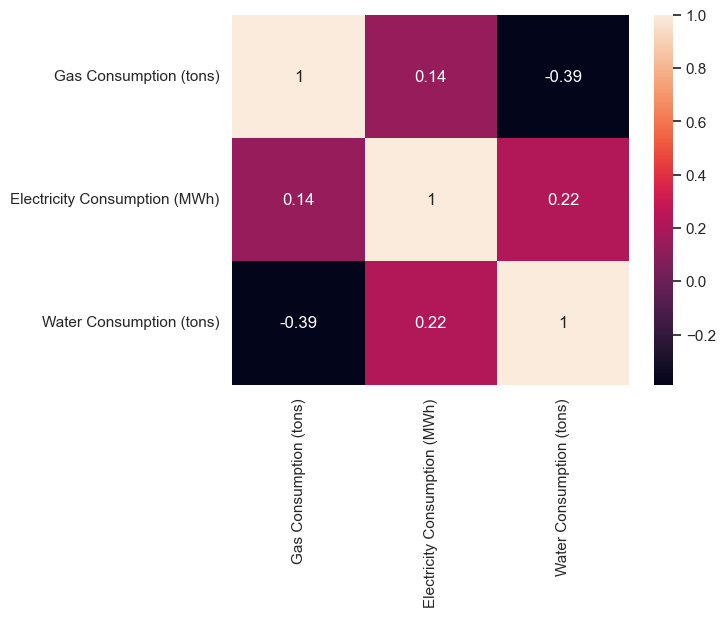

In [86]:
sns.heatmap(df.corr(),annot=True)

## Check Stationarity On Time Series

### Time Series are stationary if they do not have a trend or seasonal effects. A stationary series's mean, variance and covariance do not vary with time.<br><br>To check for stationarity of the time series, we will do a Visual Check and Augmented Dickey-Fuller Test

## 1. Visual Check

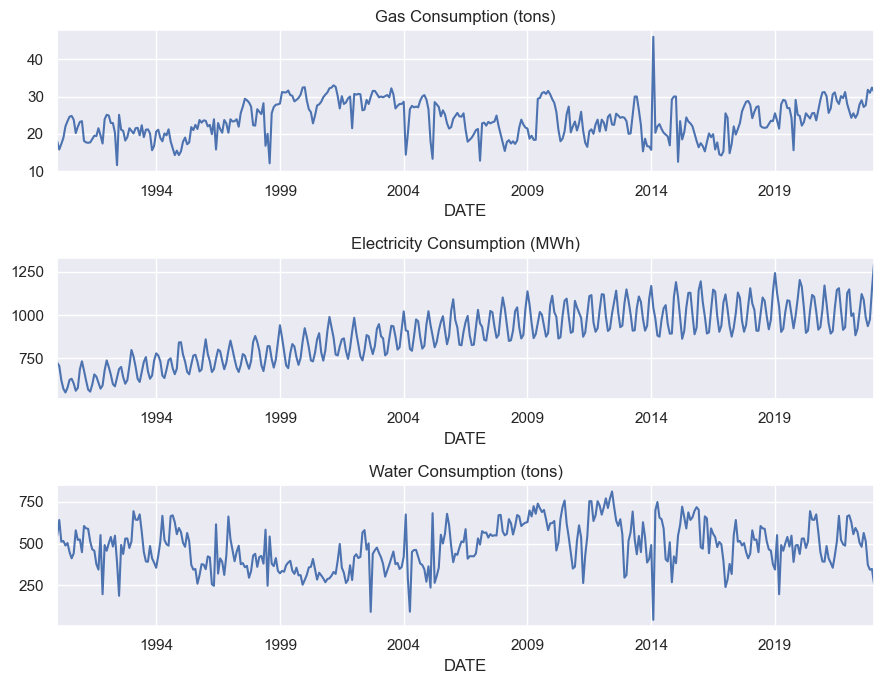

In [16]:
# Visual Check
fig, ax = plt.subplots(3, 1, figsize=(9, 7))
df['Gas Consumption (tons)'].plot(ax=ax[0])
df['Electricity Consumption (MWh)'].plot(ax=ax[1])
df['Water Consumption (tons)'].plot(ax=ax[2])
ax[0].set_title('Gas Consumption (tons)')
ax[1].set_title('Electricity Consumption (MWh)')
ax[2].set_title('Water Consumption (tons)')
plt.tight_layout()
plt.show()

### From the visual check,<br><br> Gas consumption and Water Consumption are a stationary time series, as we do not see a trend in the series, and covariance is a function of time.<br><br> For Electricity Consumption, the time series is non-stationary as the mean varies with tim, and there is an upward trend.

## 2. Augmented Dickey-Fuller Test

### Augmented Dickey-Fullter Test is a popular statistic test and is useful for determining whether the time series is stationary.

### H$_0$ (Null Hypothesis): The time series can be represented by a unit root, that is not stationary.<br><br>H$_1$ (Alternative Hypothesis): The time series is stationary

In [17]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df['Gas Consumption (tons)'])
result2 = adfuller(df['Electricity Consumption (MWh)'])
result3 = adfuller(df['Water Consumption (tons)'])
print('Gas Consumption (tons) p-value: %f' % result1[1])
print('Electricity Consumption (MWh) p-value: %f' % result2[1])
print('Water Consumption (tons) p-value: %f' % result3[1])

Gas Consumption (tons) p-value: 0.010811
Electricity Consumption (MWh) p-value: 0.186218
Water Consumption (tons) p-value: 0.000090


### Gas Consumption (tons) p value is 0.010811 which is < 0.05. Reject the null hypothesis (H0), the data does not have unit root and is stationary<br><br>Electricity Consumption (MWh) p value is 0.186218 which is > 0.05. Fail the reject the null hypothesis (H0), the data has a unit root and is non-stationary.<br><br>Water Consumption (tons) p value is 0.000090 which is < 0.05. Reject the null hypothesis (H0), the data does not have unit root and is stationary.

## Electricity Consumption is differenced in order to make the time series stationary

Electricity Consumption (MWh) before differencing p-value: 0.186218
Electricity Consumption (MWh) after differencing p-value: 0.000000


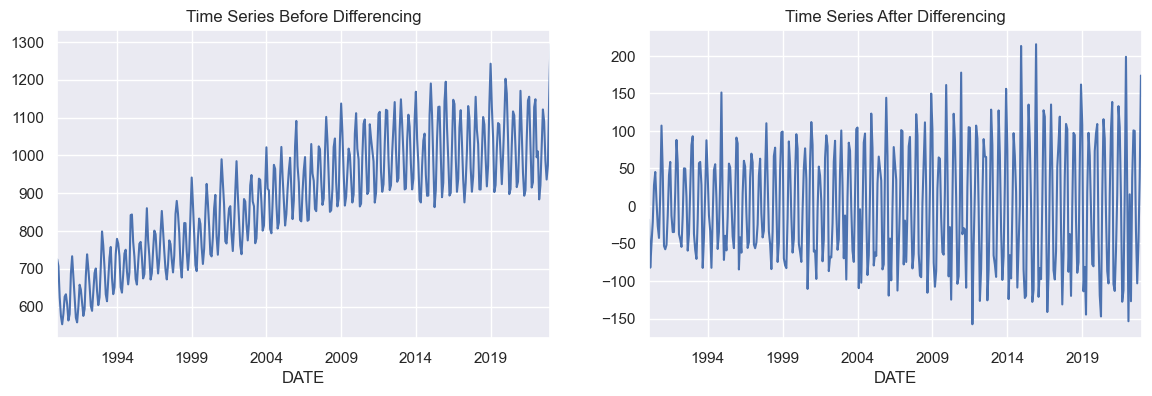

In [18]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
df_diff = diff(df['Electricity Consumption (MWh)'], k_diff=1)
result1 = adfuller(df['Electricity Consumption (MWh)'])
result2 = adfuller(df_diff)
print('Electricity Consumption (MWh) before differencing p-value: %f' % result1[1])
print('Electricity Consumption (MWh) after differencing p-value: %f' % result2[1])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['Electricity Consumption (MWh)'].plot(ax=ax[0])
df_diff.plot(ax=ax[1])
ax[0].set_title('Time Series Before Differencing')
ax[1].set_title('Time Series After Differencing')
plt.show()

## Seasonal Decomposition

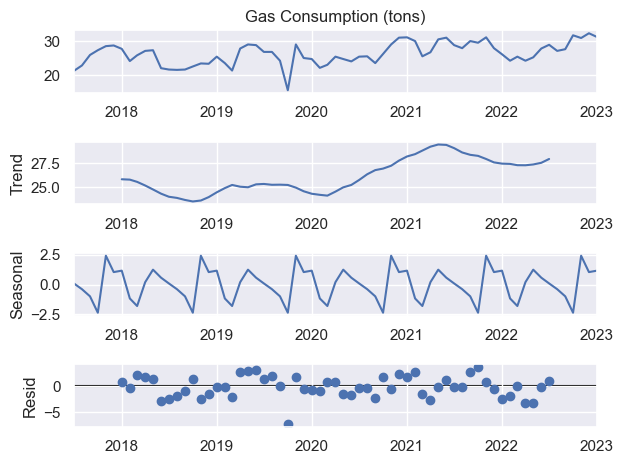

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Gas Consumption (tons)'][330:], model='additive')
result.plot()
plt.show()

### Seasonal period observed every 12 months.

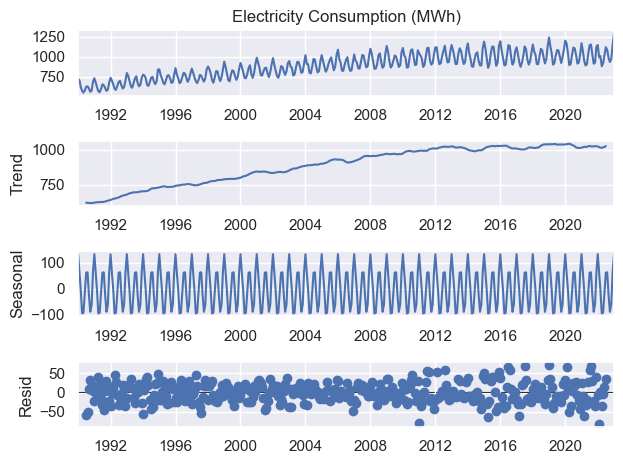

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Electricity Consumption (MWh)'], model='additive')
result.plot()
plt.show()

### Seasonal period observed every 12 months.

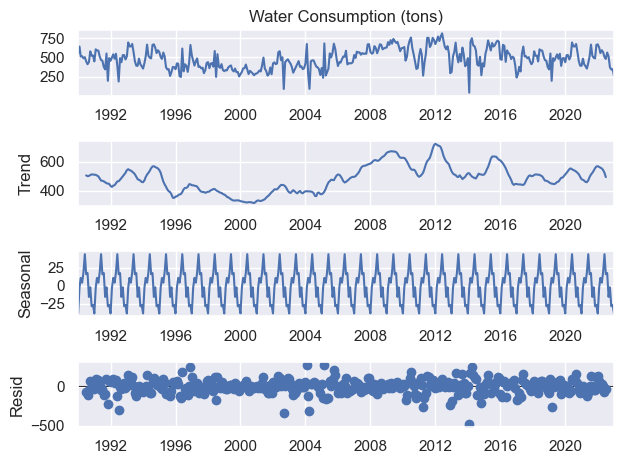

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Water Consumption (tons)'], model='additive')
result.plot()
plt.show()

### Seasonal period observed every 12 months.

## Modelling<br><br>We will forecast Gas Consumption first, Water Consumption then Electricity Consumption.<br><br>Evaluation Metrics: Mean Absolute Percentage Error (Percentage difference between predicted and actual values)

## Defining Train And Test Data

### An 90:10 ratio between training and test data is chosen where data before Year 2019-11 is used for training and data from Year 2019-11 is used for testing

In [22]:
hDF = df.copy()
train_data = hDF[hDF.index<'2019-11']
test_data = hDF[hDF.index>='2019-11']
(len(train_data)/(len(test_data) + len(train_data))) * 100

90.17632241813602

In [23]:
gasTrain = train_data[['Gas Consumption (tons)']]
waterTrain = train_data[['Water Consumption (tons)']]
electricityTrain = train_data[['Electricity Consumption (MWh)']]

In [24]:
gasTest = test_data[['Gas Consumption (tons)']]
waterTest = test_data[['Water Consumption (tons)']]
electricityTest = test_data[['Electricity Consumption (MWh)']]

# Gas Consumption

### Exponential Smoothing (As a Baseline)

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
expoModel = ExponentialSmoothing(gasTrain,trend='add',seasonal='add',seasonal_periods=12).fit()
pred = expoModel.forecast(len(gasTest))
mape = mean_absolute_percentage_error(gasTest,pred)*100

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


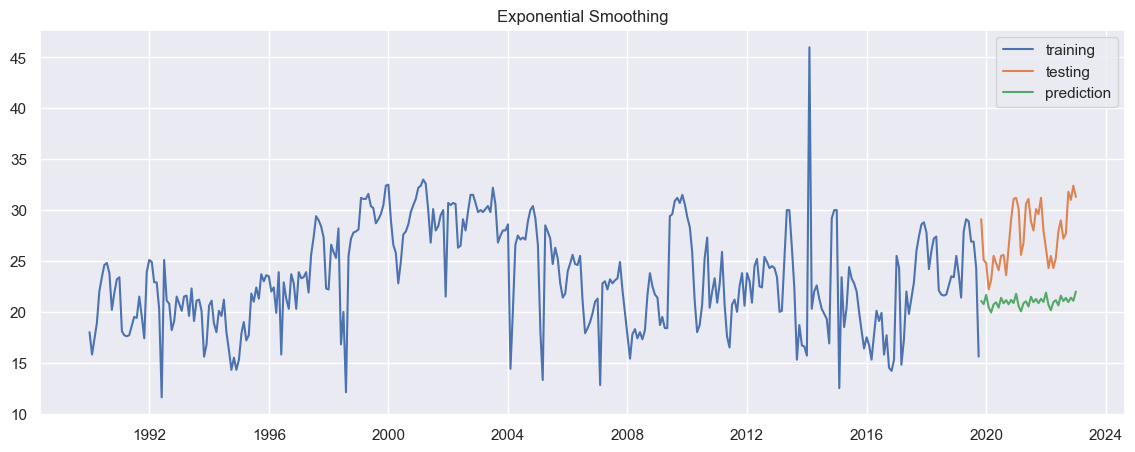

In [26]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain.index,gasTrain, label='training')
ax.plot(gasTest.index,gasTest, label='testing')
ax.plot(gasTest.index, pred, label='prediction')
plt.legend()
plt.title('Exponential Smoothing')
plt.show()

In [27]:
print(f'Test Data Mean Absolute Percentage Error: {mape:.2f}%')

Test Data Mean Absolute Percentage Error: 23.13%


## ACF and PACF Plot

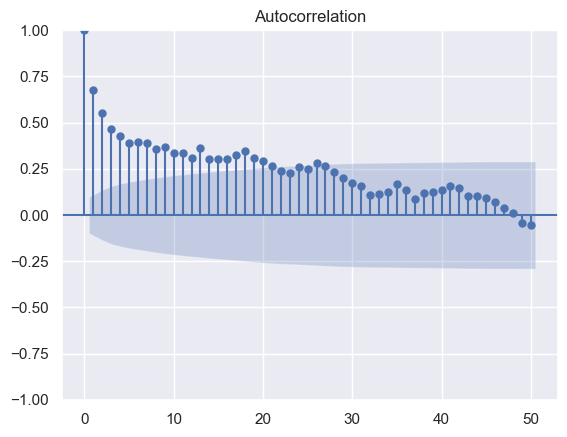

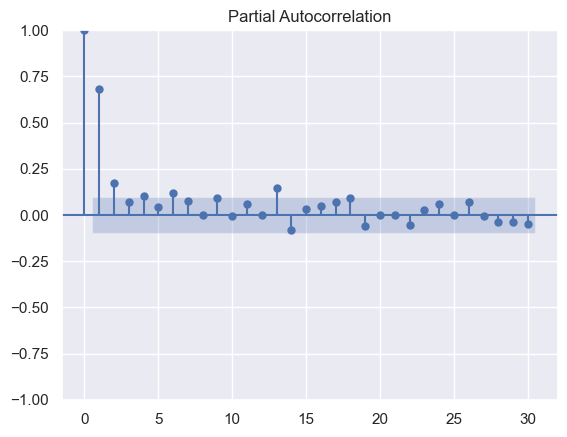

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(hDF['Gas Consumption (tons)'],lags=50)
plot_pacf(hDF['Gas Consumption (tons)'],lags=30)
plt.show()

### Tail off at ACF Plot, which indicates an AR model. From PACF plot, cut off happens at lag 2. This illustrates an AR(2) model

## Gas Consumption Auto Arima Model

### Auto Arima seeks to find the most ideal parameter to help us get started.

In [29]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(gasTrain,seasonal=True,m=12,n_jobs=-1)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  358
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -957.346
Date:                             Thu, 10 Aug 2023   AIC                           1922.691
Time:                                     22:37:36   BIC                           1938.202
Sample:                                 01-01-1990   HQIC                          1928.860
                                      - 10-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4428      0.041     10.812      0.000       0.363       0.523
ma.L1         -0.8979      0.035    -25.549      0.000      -0.967      -0.829
ar.S.L12      -0.1163      0.033     -3.527      0.000      -0.181      -0.052
sigma2        12.4585      0.468     26.629      0.000      11.542      13.375
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1891.78
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

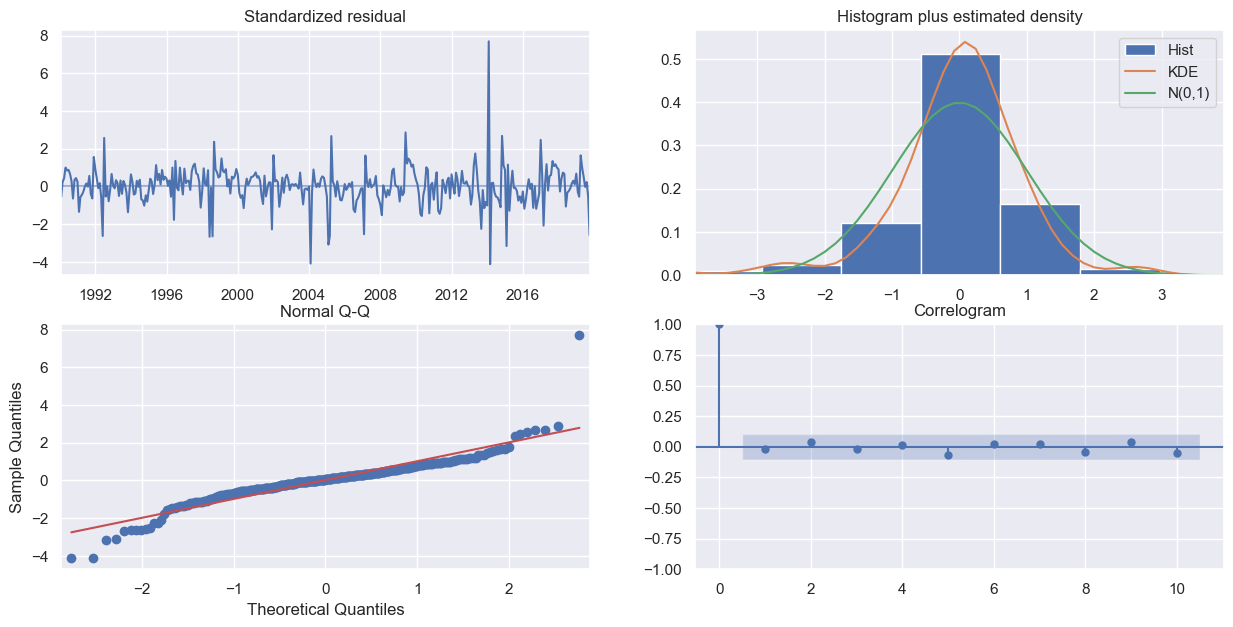

In [30]:
arima_model.plot_diagnostics(figsize=(15,7))
plt.show()

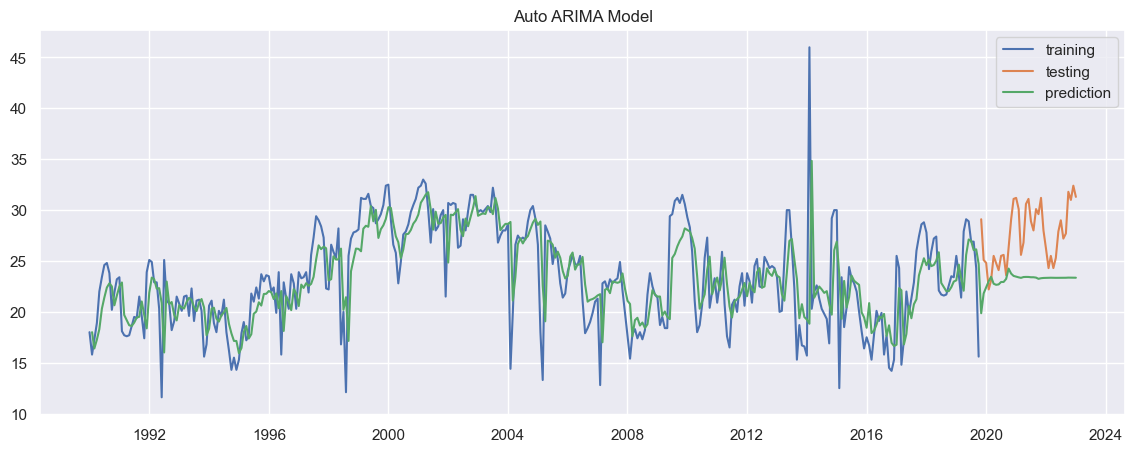

In [31]:
# use the model to make predictions
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=len(gasTest))
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain, label='training')
ax.plot(gasTest, label='testing')
ax.plot(hDF.index[1:], pred_full[1:], label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

In [32]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(gasTrain, pred_in_sample)
mape_test = mean_absolute_percentage_error(gasTest, pred_out_sample)

print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 11.19%
Model Mean Absolute Percentage Error on testing data is 15.39%


##  Gas Consumption Sarima model

### Sarimax is a seasonal ARIMA model

In [33]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(gasTrain,order=(2,1,1),seasonal_order=(1,1,1,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  358
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -948.040
Date:                            Thu, 10 Aug 2023   AIC                           1908.079
Time:                                    22:37:56   BIC                           1931.141
Sample:                                01-01-1990   HQIC                          1917.263
                                     - 10-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4427      0.048      9.233      0.000       0.349       0.537
ar.L2          0.0314      0.058      0.542      0.587      -0.082       0.145
ma.L1         -0.9022      0.043    -21.140      0.000      -0.986      -0.819
ar.S.L12      -0.1049      0.042     -2.508      0.012      -0.187      -0.023
ma.S.L12      -0.9996      6.995     -0.143      0.886     -14.710      12.711
sigma2        12.5396     87.516      0.143      0.886    -158.988     184.067
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2508.97
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

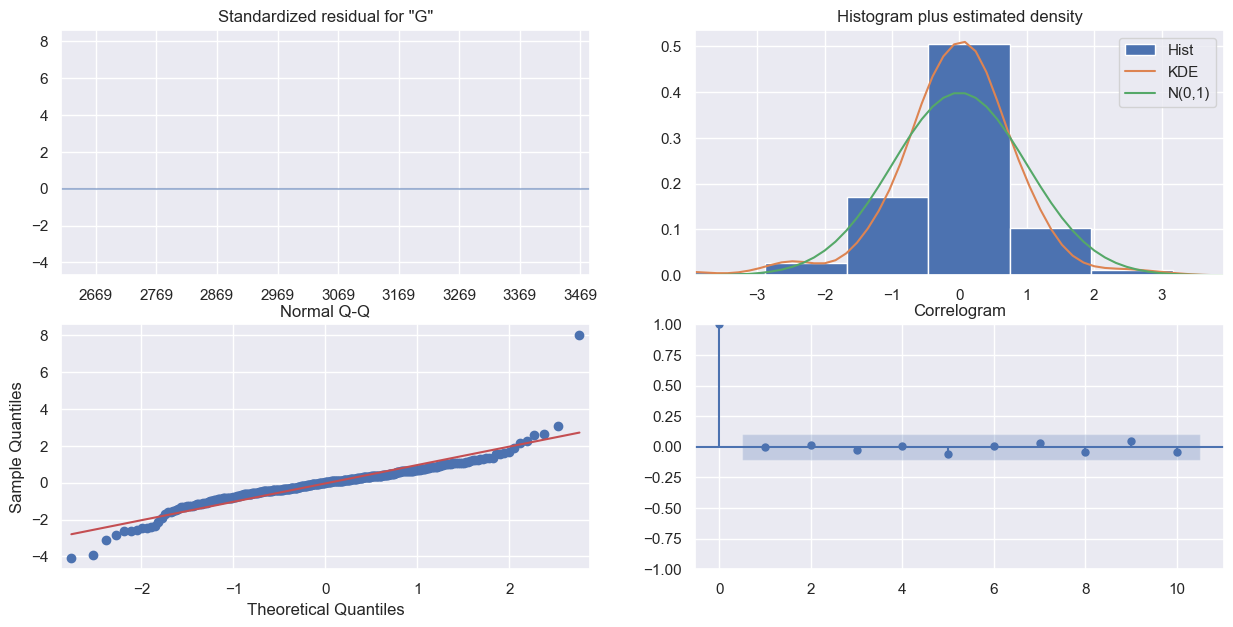

In [34]:
sarimax_model.plot_diagnostics(figsize=(15,7))
plt.show()

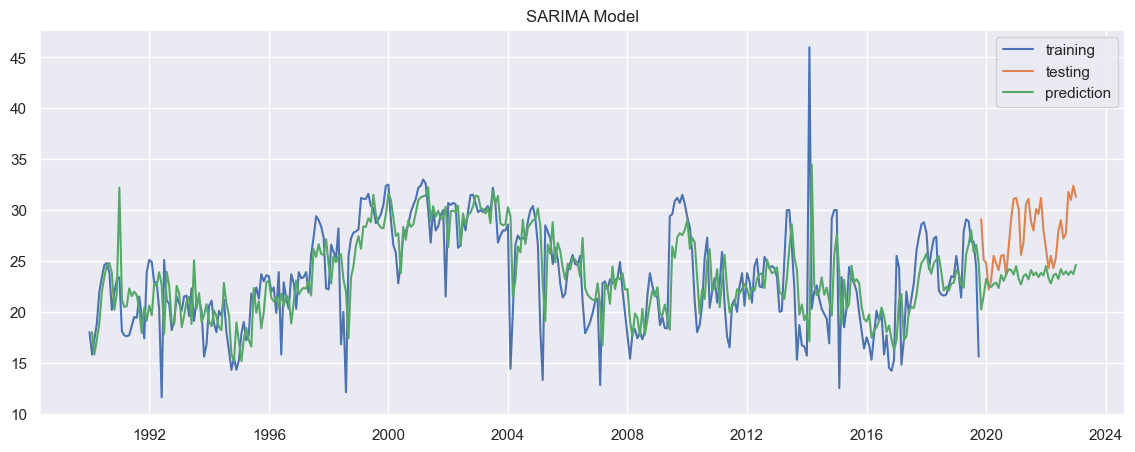

In [35]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain, label='training')
ax.plot(gasTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [36]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(gasTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(gasTrain[1:], pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 11.86%
Model Mean Absolute Percentage Error on testing data is 14.45%
RMSE on training data is 0.34
RMSE on testing data is 0.38


## Sarimax Model With Log Transformation

In [37]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(np.log(gasTrain), order=(2,1,1),seasonal_order=(1,1,1,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  358
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 118.895
Date:                            Thu, 10 Aug 2023   AIC                           -225.791
Time:                                    22:38:06   BIC                           -202.730
Sample:                                01-01-1990   HQIC                          -216.607
                                     - 10-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4322      0.049      8.900      0.000       0.337       0.527
ar.L2          0.0375      0.057      0.658      0.511      -0.074       0.149
ma.L1         -0.9088      0.037    -24.521      0.000      -0.981      -0.836
ar.S.L12      -0.0879      0.038     -2.288      0.022      -0.163      -0.013
ma.S.L12      -0.9939      0.450     -2.210      0.027      -1.875      -0.112
sigma2         0.0260      0.011      2.299      0.022       0.004       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               539.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predictions are scaled back for us to intepret the results.

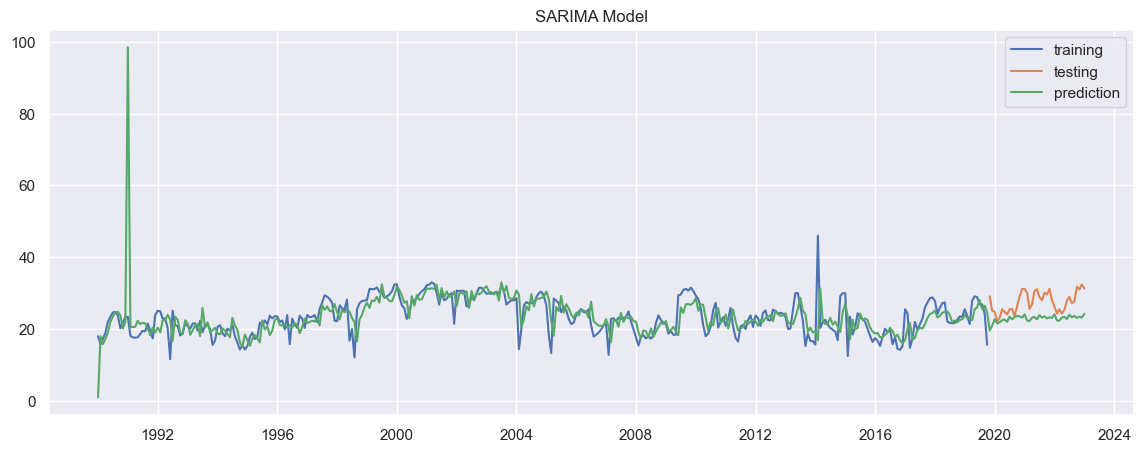

In [38]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = np.exp(pred)
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain, label='training')
ax.plot(gasTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [39]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(gasTrain, pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(gasTrain, pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 13.10%
Model Mean Absolute Percentage Error on testing data is 16.05%
RMSE on training data is 0.36
RMSE on testing data is 0.40


### Since the MAPE increased, we will not use log transformation.

## Gas Consumption AR Model

In [40]:
from statsmodels.tsa.ar_model import AutoReg
arModel = AutoReg(gasTrain,lags=2)
arModelFit = arModel.fit()
print(arModelFit.summary())

                              AutoReg Model Results                               
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  358
Model:                         AutoReg(2)   Log Likelihood                -960.562
Method:                   Conditional MLE   S.D. of innovations              3.594
Date:                    Thu, 10 Aug 2023   AIC                           1929.124
Time:                            22:38:11   BIC                           1944.624
Sample:                        03-01-1990   HQIC                          1935.290
                             - 10-01-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.5060      1.015      6.412      0.000       4.517       8.495
Gas Consumption (tons).L1     0.5521      0.053     10

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


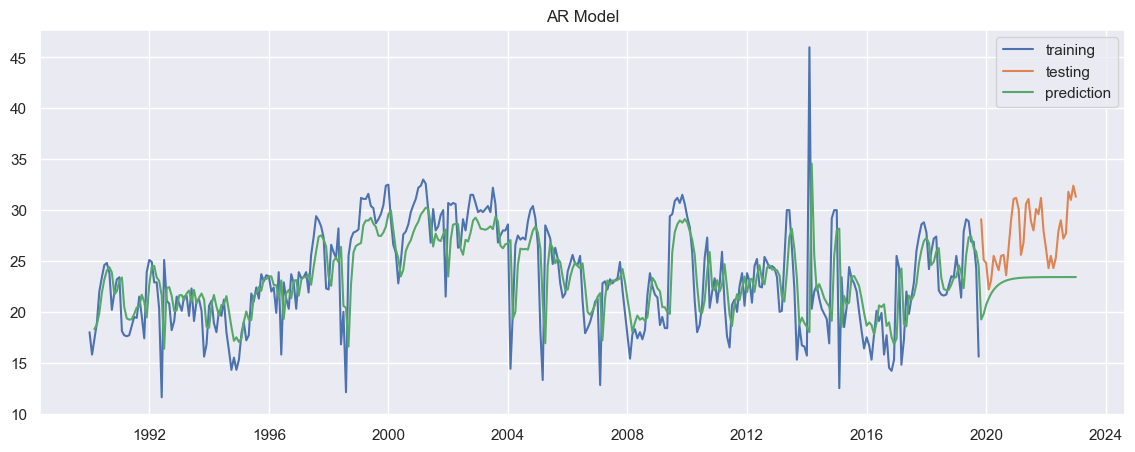

In [41]:
pred = arModelFit.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[2:] #Remove First 2 NaN Values
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain, label='training')
ax.plot(gasTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('AR Model')
plt.show()

In [42]:
# To evaluate the AR model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(gasTrain[2:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(gasTrain[2:], pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 11.33%
Model Mean Absolute Percentage Error on testing data is 16.15%
RMSE on training data is 0.34
RMSE on testing data is 0.40


## Since our SARIMA model has the lowest AIC and BIC as well as the lowest MAPE, we will further try to improve our model by finding the best order and seasonal order for it.

## For Loop to find the Best Order for the Gas' SARIMAX model

In [168]:
p_values = range(1,4)
d_values = range(1,2)
q_values = range(1,4)
P_values = range(1,4)
D_values = range(1,2)
Q_values = range(1,4)
seasonality = [12]
bestMapeOrder = None
bestAICOrder= None
bestBICOrder = None
bestAICBICOrder = None
bestAIC = 100000000
bestMape = 10000000
bestBIC = 1000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in seasonality:
                            order=(p,d,q)
                            seasonalOrder=(P,D,Q,s)
                        try:
                            
                            model = SARIMAX(gasTrain,order=order,seasonal_order=seasonalOrder).fit()
                            predictions = model.forecast(steps=len(gasTest))
                            mape = mean_absolute_percentage_error(gasTest, predictions)
                            
                            if(model.aic<bestAIC):
                                bestAIC = model.aic
                                bestAICOrder= f'({order},{seasonalOrder})'
                            if(model.bic<bestBIC):
                                bestBIC = model.bic
                                bestBICOrder= f'({order},{seasonalOrder})'
                            if(model.bic<bestBIC and model.aic<bestAIC):
                                bestAICBICOrder= f'({order},{seasonalOrder})'
                                
                            if(mape<bestMape):
                                bestMapeaic = model.aic
                                bestMape = mape
                                bestMapeOrder= f'({order},{seasonalOrder})'  
                            
                                
                        except Exception as e:
                            print(f'LU Decomposition Error: {order},{seasonalOrder}')
                            

print(f'Order for Best AIC:{bestAICOrder}')
print(f'Order for Best BIC:{bestBICOrder}')
print(f'Order for Best AIC and BIC:{bestAICBICOrder}')
print(f'Order for Best MAPE:{bestMapeOrder}')
                            
                            

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

LU Decomposition Error: (1, 1, 2),(2, 1, 3, 12)


C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so 

Order for Best AIC:((1, 1, 1),(1, 1, 1, 12))
Order for Best BIC:((1, 1, 1),(1, 1, 1, 12))
Order for Best AIC and BIC:None
Order for Best MAPE:((3, 1, 1),(3, 1, 1, 12))


## Gas' SARIMA Model (After Improvement)

In [43]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(gasTrain, order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  358
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -948.172
Date:                            Thu, 10 Aug 2023   AIC                           1906.345
Time:                                    22:38:49   BIC                           1925.563
Sample:                                01-01-1990   HQIC                          1913.998
                                     - 10-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4477      0.043     10.317      0.000       0.363       0.533
ma.L1         -0.8948      0.036    -25.041      0.000      -0.965      -0.825
ar.S.L12      -0.1115      0.042     -2.649      0.008      -0.194      -0.029
ma.S.L12      -0.9997      9.888     -0.101      0.919     -20.379      18.380
sigma2        12.5475    123.852      0.101      0.919    -230.197     255.292
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2482.43
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

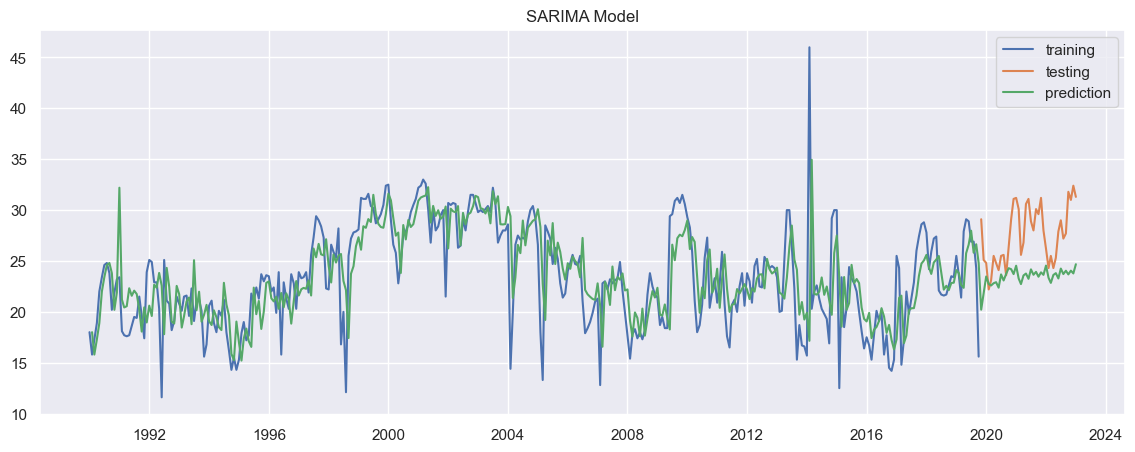

In [44]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(gasTrain, label='training')
ax.plot(gasTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [45]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(gasTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(gasTrain[1:], pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(gasTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 11.86%
Model Mean Absolute Percentage Error on testing data is 14.25%
RMSE on training data is 0.34
RMSE on testing data is 0.38


# Water Consumption (tons)

## Exponential Smoothing (As a Baseline)

In [46]:
expoModel = ExponentialSmoothing(waterTrain,trend='add',seasonal='add',seasonal_periods=12).fit()
pred = expoModel.forecast(len(waterTest))
mape = mean_absolute_percentage_error(waterTest,pred)*100

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


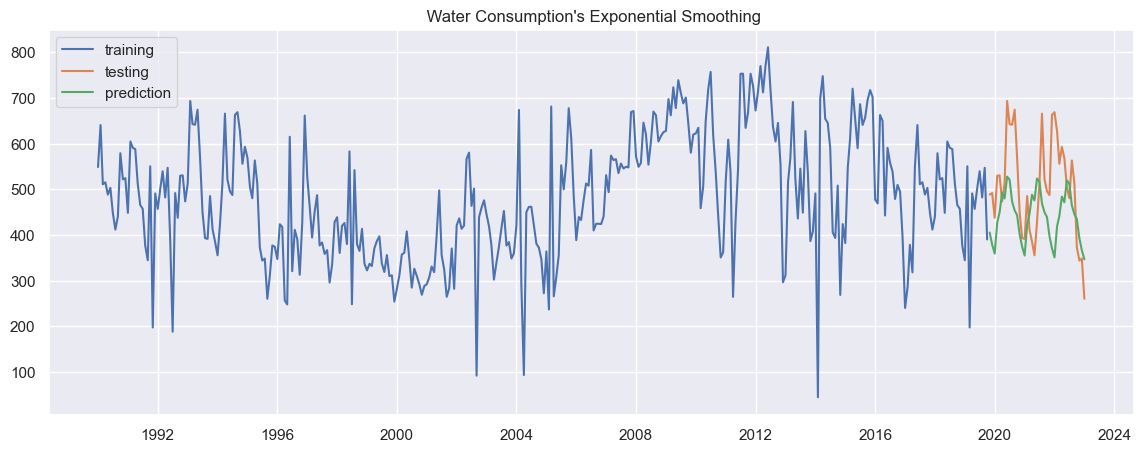

In [47]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(waterTrain.index,waterTrain, label='training')
ax.plot(waterTest.index,waterTest, label='testing')
ax.plot(waterTest.index, pred, label='prediction')
plt.legend()
plt.title(' Water Consumption\'s Exponential Smoothing')
plt.show()

In [48]:
print(f'Test Data Mean Absolute Percentage Error: {mape:.2f}%')

Test Data Mean Absolute Percentage Error: 18.47%


## Water Consumption's ACF and PACF plot

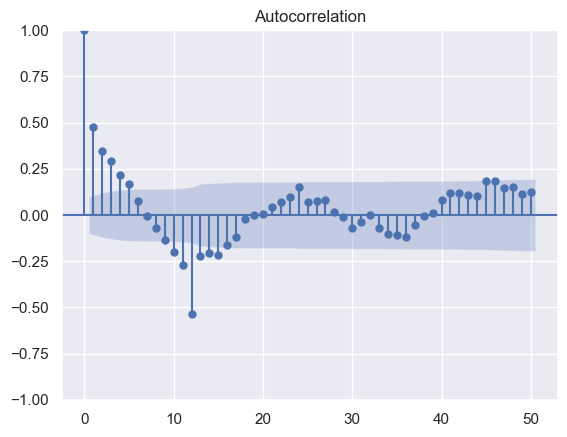

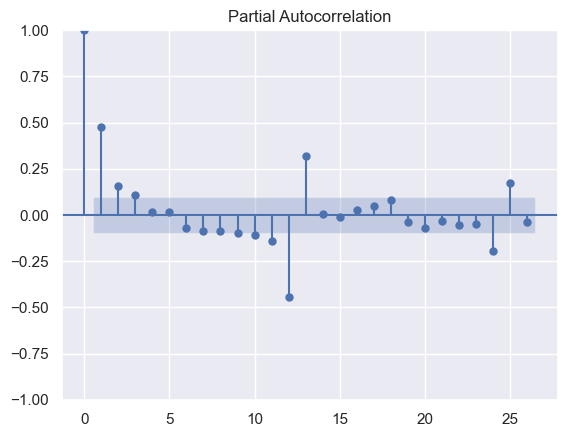

In [49]:
seasonalWaterDF = df.copy()
seasonalWaterDF = seasonalWaterDF[['Water Consumption (tons)']]
seasonalWaterDF['Seasonal Diff'] = seasonalWaterDF['Water Consumption (tons)'].diff(12)
seasonalWaterDF = seasonalWaterDF.dropna()

#Seasonal acf and pacf
plot_acf(seasonalWaterDF['Seasonal Diff'],lags=50)
plot_pacf(seasonalWaterDF['Seasonal Diff'])
plt.show()

### Tail off at ACF Plot, which indicates an AR model. From PACF plot, cut off happens at lag 2. This illustrates an AR(2) model

In [50]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(waterTrain,seasonal=True,m=12,n_jobs=-1)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  358
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -2156.629
Date:                             Thu, 10 Aug 2023   AIC                           4325.259
Time:                                     22:39:41   BIC                           4348.525
Sample:                                 01-01-1990   HQIC                          4334.513
                                      - 10-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6593      0.110      5.997      0.000       0.444       0.875
ma.L1         -1.2279      0.120    -10.210      0.000      -1.464      -0.992
ma.L2          0.2631      0.101      2.598      0.009       0.065       0.462
ar.S.L12       0.0620      0.054      1.156      0.248      -0.043       0.167
ar.S.L24       0.1468      0.065      2.244      0.025       0.019       0.275
sigma2       1.03e+04    534.503     19.262      0.000    9248.063    1.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               110.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

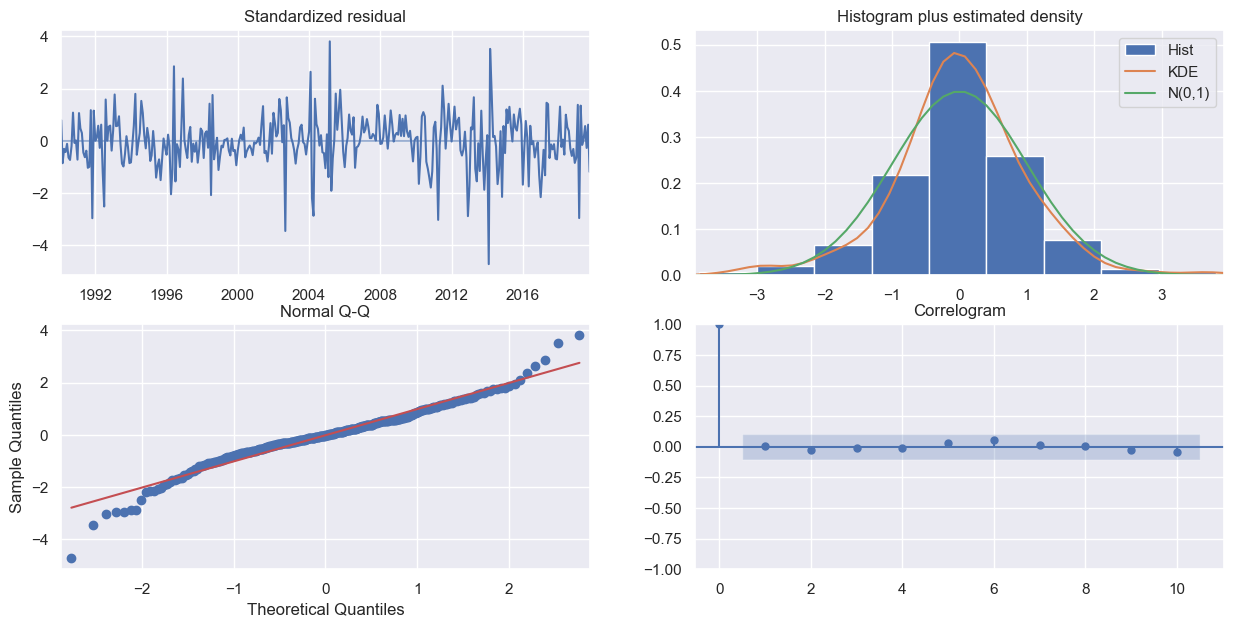

In [51]:
arima_model.plot_diagnostics(figsize=(15,7))
plt.show()

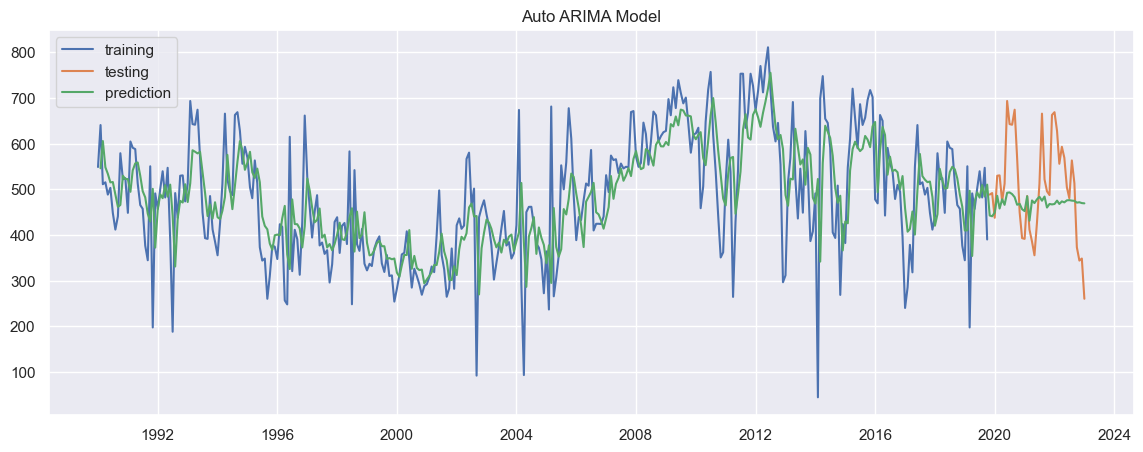

In [52]:
# use the model to make predictions
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=len(waterTest))
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
pred_full = pred_full[1:] 
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(waterTrain, label='training')
ax.plot(waterTest, label='testing')
ax.plot(hDF.index[1:], pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

In [53]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(waterTrain, pred_in_sample)
mape_test = mean_absolute_percentage_error(waterTest, pred_out_sample)
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 21.53%
Model Mean Absolute Percentage Error on testing data is 17.50%


## Water Exogenous Variables

### Exogenous variables are external factors that might indirectly affect water's time series

In [54]:
waterExogenousTrain = gasTrain
waterExogenousTest = gasTest

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(waterTrain,exog=waterExogenousTrain, order=(1,1,2),seasonal_order=(2,1,1,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:             Water Consumption (tons)   No. Observations:                  358
Model:             SARIMAX(1, 1, 2)x(2, 1, [1], 12)   Log Likelihood               -2080.181
Date:                              Thu, 10 Aug 2023   AIC                           4176.362
Time:                                      22:39:53   BIC                           4207.111
Sample:                                  01-01-1990   HQIC                          4188.608
                                       - 10-01-2019                                         
Covariance Type:                                opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gas Consumption (tons)   -11.0173      0.962    -11.458      0.000     -12.902      -9.133
ar.L1                      0.7407      0.060     12.282      0.000       0.623       0.859
ma.L1                     -1.2433      0.121    -10.276      0.000      -1.480      -1.006
ma.L2                      0.2446      0.087      2.821      0.005       0.075       0.415
ar.S.L12                   0.1129      0.070      1.618      0.106      -0.024       0.250
ar.S.L24                   0.1210      0.063      1.914      0.056      -0.003       0.245
ma.S.L12                  -0.9502      0.069    -13.849      0.000      -1.085      -0.816
sigma2                  9291.5697    953.835      9.741      0.000    7422.088    1.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                33.70
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

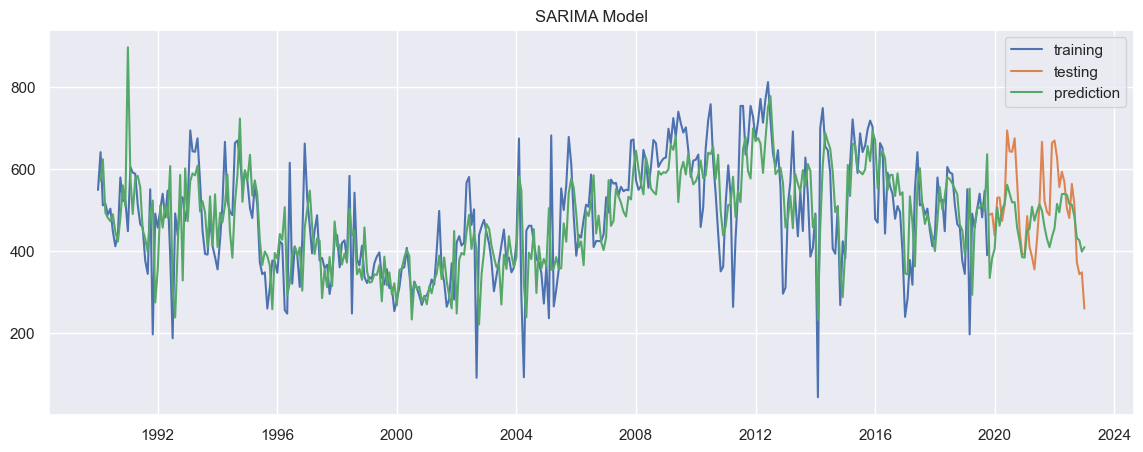

In [56]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01',exog = waterExogenousTest).predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(waterTrain, label='training')
ax.plot(waterTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

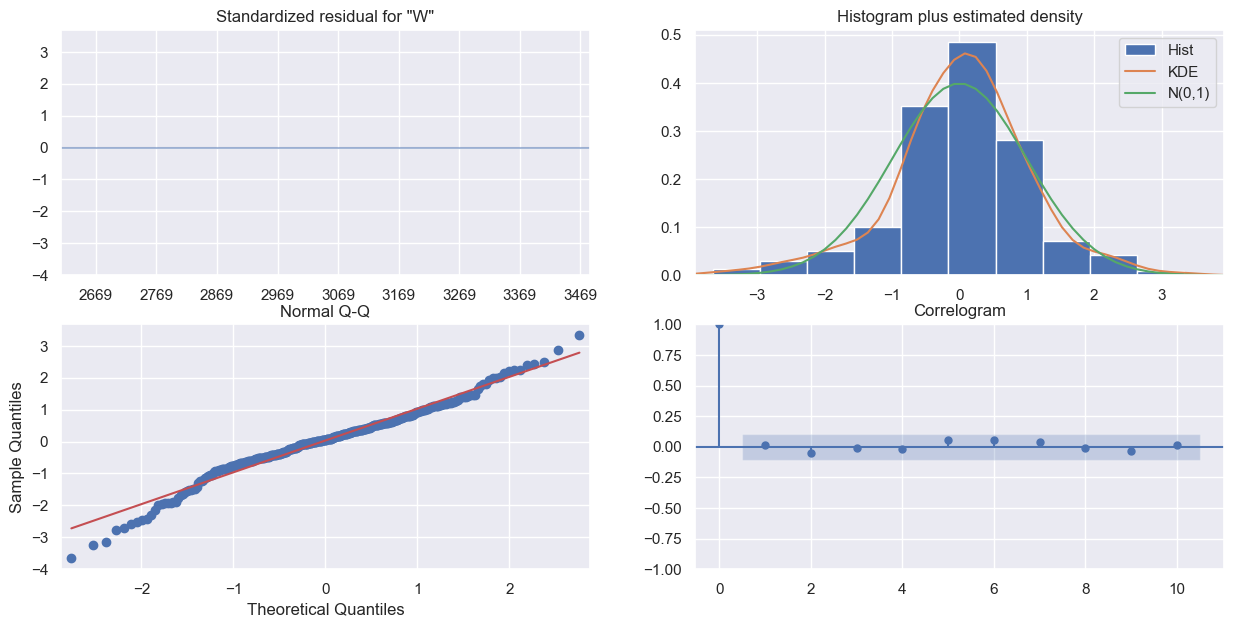

In [57]:
sarimax_model.plot_diagnostics(figsize=(15,7))
plt.show()

In [58]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(waterTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(waterTest, pred[pred.index>='2019-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 19.53%
Model Mean Absolute Percentage Error on testing data is 15.52%


## AR(2) Model

In [59]:
from statsmodels.tsa.ar_model import AutoReg
arModel = AutoReg(waterTrain,lags=2)
arModelFit = arModel.fit()
print(arModelFit.summary())

                               AutoReg Model Results                                
Dep. Variable:     Water Consumption (tons)   No. Observations:                  358
Model:                           AutoReg(2)   Log Likelihood               -2160.946
Method:                     Conditional MLE   S.D. of innovations            104.704
Date:                      Thu, 10 Aug 2023   AIC                           4329.892
Time:                              22:39:58   BIC                           4345.392
Sample:                          03-01-1990   HQIC                          4336.058
                               - 10-01-2019                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         146.4027     22.474      6.514      0.000     102.354     190.452
Water Consumption (tons).L1     

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


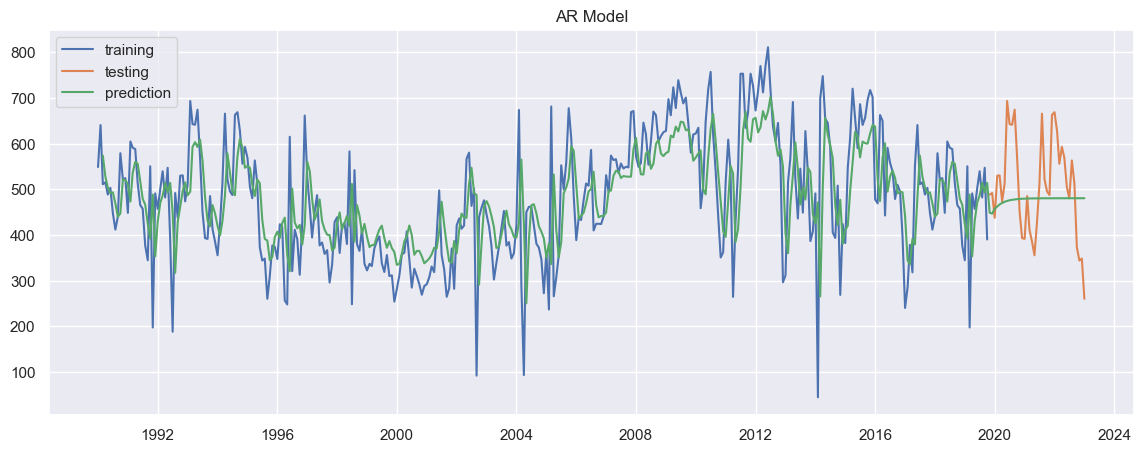

In [60]:
pred = arModelFit.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[2:] #Remove First 2 NaN Values
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(waterTrain, label='training')
ax.plot(waterTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('AR Model')
plt.show()

In [61]:
# To evaluate the AR model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(waterTrain[2:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(waterTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(waterTrain[2:], pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(waterTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 22.05%
Model Mean Absolute Percentage Error on testing data is 18.32%
RMSE on training data is 0.47
RMSE on testing data is 0.43


## For Loop to find the Best Order for the Water's SARIMAX model

In [62]:
p_values = range(1,4)
d_values = range(1,2)
q_values = range(1,4)
P_values = range(1,4)
D_values = range(1,2)
Q_values = range(1,4)
seasonality = [12]
bestMapeOrder = None
bestAICOrder= None
bestBICOrder = None
bestAIC = 100000000
bestMape = 10000000
bestBIC = 1000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in seasonality:
                            order=(p,d,q)
                            seasonalOrder=(P,D,Q,s)
                        try:
                            
                            model = SARIMAX(waterTrain,exog=waterExogenousTrain,order=order,seasonal_order=seasonalOrder).fit()
                            predictions = model.forecast(steps=len(waterTest),exog=waterExogenousTest)
                            mape = mean_absolute_percentage_error(waterTest, predictions)
                            
                            if(model.aic<bestAIC):
                                bestAIC = model.aic
                                bestAICOrder= f'({order},{seasonalOrder})'
                            if(model.bic<bestBIC):
                                bestBIC = model.bic
                                bestBICOrder= f'({order},{seasonalOrder})'
                                
                            if(mape<bestMape):
                                bestMapeaic = model.aic
                                bestMape = mape
                                bestMapeOrder= f'({order},{seasonalOrder})'  
                            
                                
                        except Exception as e:
                            print(f'LU Decomposition Error: {order},{seasonalOrder}')
                            

print(f'Order for Best AIC:{bestAICOrder}')
print(f'Order for Best BIC:{bestBICOrder}')
print(f'Order for Best MAPE:{bestMapeOrder}')
                            
                            

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so 

Order for Best AIC:((1, 1, 1),(2, 1, 1, 12))
Order for Best BIC:((1, 1, 1),(2, 1, 1, 12))
Order for Best MAPE:((2, 1, 3),(2, 1, 2, 12))


### We will choose order (2,1,3),(2,1,2,12) for best MAPE, although the AIC and BIC will be abit higher, it will be a good trade off for better accuracy.

## Water's SARIMA Model (After Improvement)

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(waterTrain,exog=waterExogenousTrain, order=(2,1,3),seasonal_order=(2,1,2,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                Water Consumption (tons)   No. Observations:                  358
Model:             SARIMAX(2, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -2080.853
Date:                                 Thu, 10 Aug 2023   AIC                           4183.705
Time:                                         22:49:18   BIC                           4225.984
Sample:                                     01-01-1990   HQIC                          4200.543
                                          - 10-01-2019                                         
Covariance Type:                                   opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gas Consumption (tons)   -10.2715      0.980    -10.483      0.000     -12.192      -8.351
ar.L1                     -0.2424      0.059     -4.137      0.000      -0.357      -0.128
ar.L2                      0.7568      0.059     12.935      0.000       0.642       0.871
ma.L1                     -0.2822      1.749     -0.161      0.872      -3.711       3.146
ma.L2                     -0.9840      1.241     -0.793      0.428      -3.417       1.449
ma.L3                      0.2663      0.485      0.550      0.583      -0.683       1.216
ar.S.L12                  -0.4140      0.417     -0.993      0.320      -1.231       0.403
ar.S.L24                   0.1578      0.067      2.350      0.019       0.026       0.289
ma.S.L12                  -0.4431      0.428     -1.036      0.300      -1.282       0.395
ma.S.L24                  -0.4987      0.378     -1.318      0.187      -1.240       0.243
sigma2                  9165.6061   1.58e+04      0.579      0.562   -2.18e+04    4.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                28.54
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

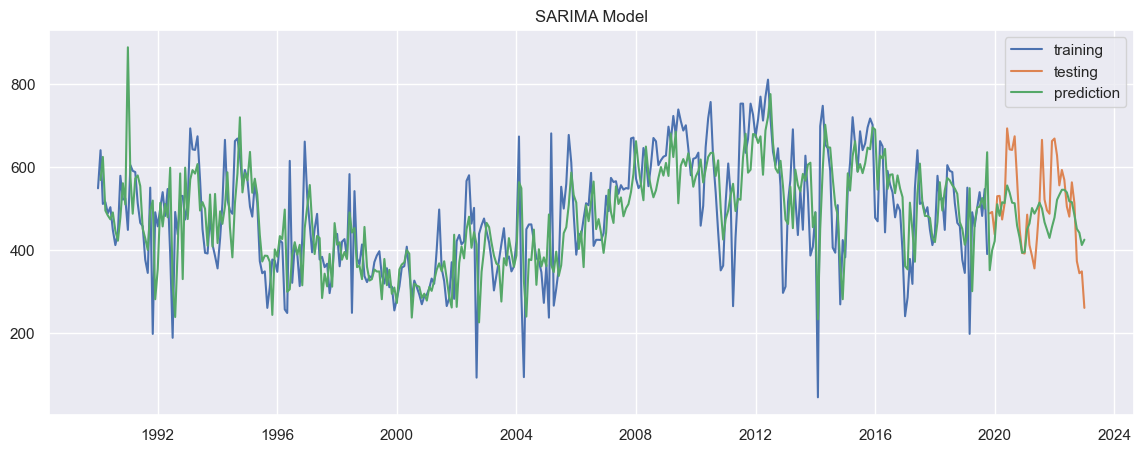

In [64]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01',exog = waterExogenousTest).predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(waterTrain, label='training')
ax.plot(waterTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [65]:
# To evaluate the SARIMA model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(waterTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(waterTest, pred[pred.index>='2019-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 19.63%
Model Mean Absolute Percentage Error on testing data is 15.15%


## Electricity Consumption (MWh)

## Exponential Smoothing (As a Baseline)

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
expoModel = ExponentialSmoothing(electricityTrain,trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit()
pred = expoModel.forecast(len(electricityTest))
mape = mean_absolute_percentage_error(electricityTest,pred)*100

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


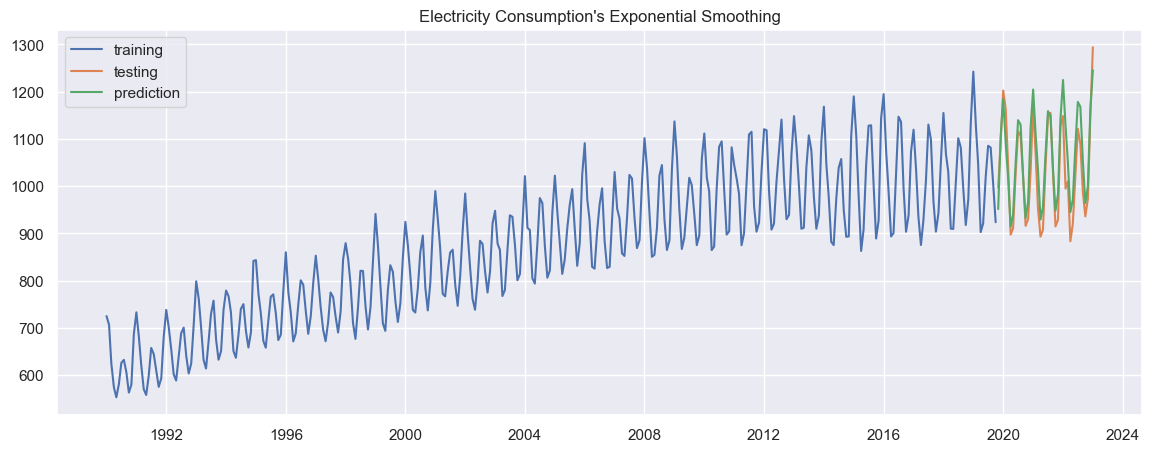

In [67]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(electricityTrain.index,electricityTrain, label='training')
ax.plot(electricityTest.index,electricityTest, label='testing')
ax.plot(electricityTest.index, pred, label='prediction')
plt.legend()
plt.title('Electricity Consumption\'s Exponential Smoothing')
plt.show()

In [68]:
print(f'Test Data Mean Absolute Percentage Error: {mape:.2f}%')

Test Data Mean Absolute Percentage Error: 3.99%


## Electricity's ACF and PACF Plot

### Electricity is first differenced then plugged into the ACF and PACF Plot.

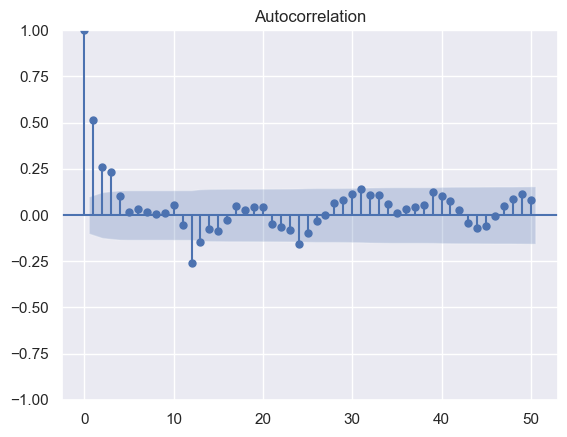

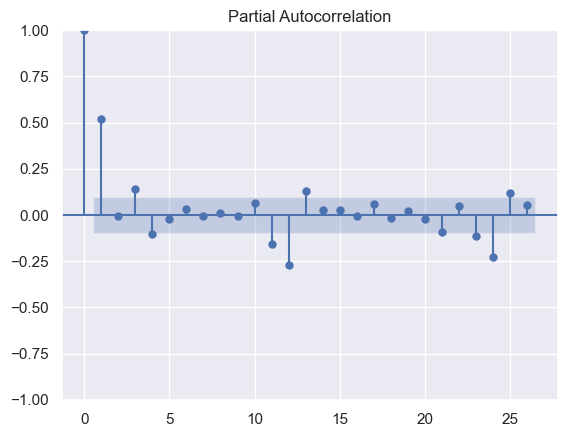

In [69]:
seasonalElectricityDF = df.copy()
seasonalElectricityDF = seasonalElectricityDF[['Electricity Consumption (MWh)']]
seasonalElectricityDF['Seasonal Diff'] = seasonalElectricityDF['Electricity Consumption (MWh)'].diff(12)
seasonalElectricityDF = seasonalElectricityDF.dropna()

#Seasonal acf and pacf
plot_acf(seasonalElectricityDF['Seasonal Diff'],lags=50)
plot_pacf(seasonalElectricityDF['Seasonal Diff'])
plt.show()

### Tail off at ACF Plot, which indicates an AR model. From PACF plot, cut off happens at lag 1. This illustrates an AR(1) model

## Electricity Auto Arima

In [70]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(electricityTrain,seasonal=True,m=12,n_jobs=-1)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  358
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1630.415
Date:                            Thu, 10 Aug 2023   AIC                           3274.831
Time:                                    22:50:21   BIC                           3301.975
Sample:                                01-01-1990   HQIC                          3285.627
                                     - 10-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0030      0.009      0.356      0.722      -0.014       0.020
ar.L1          0.5783      0.056     10.293      0.000       0.468       0.688
ar.L2         -0.1063      0.055     -1.933      0.053      -0.214       0.002
ma.L1         -0.9503      0.019    -51.105      0.000      -0.987      -0.914
ar.S.L12       0.9945      0.005    219.480      0.000       0.986       1.003
ma.S.L12      -0.7362      0.044    -16.894      0.000      -0.822      -0.651
sigma2       496.5159     30.662     16.193      0.000     436.419     556.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.29
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

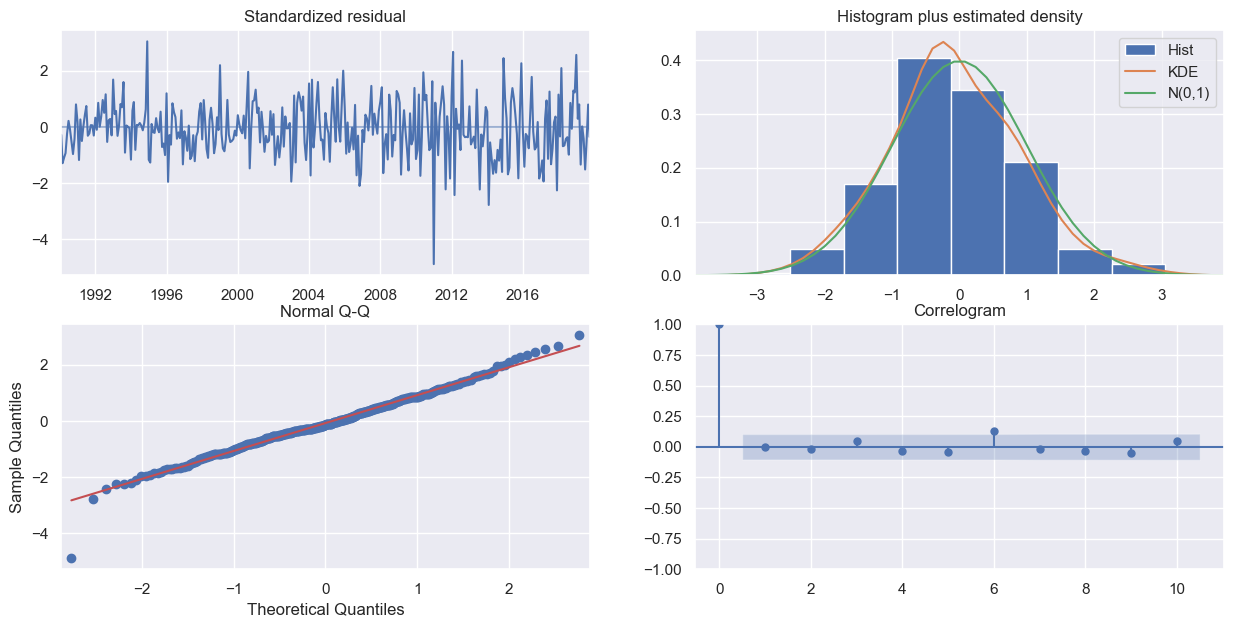

In [71]:
arima_model.plot_diagnostics(figsize=(15,7))
plt.show()

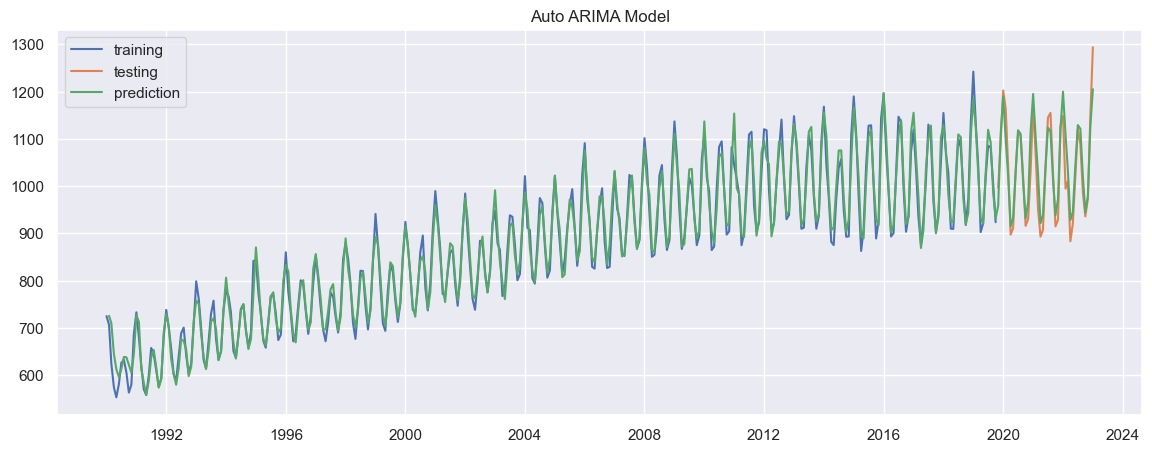

In [72]:
# use the model to make predictions
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=len(electricityTest))
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(electricityTrain, label='training')
ax.plot(electricityTest, label='testing')
ax.plot(hDF.index[1:], pred_full[1:], label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

In [73]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(electricityTrain, pred_in_sample)
mape_test = mean_absolute_percentage_error(electricityTest, pred_out_sample)
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 2.36%
Model Mean Absolute Percentage Error on testing data is 2.95%


## Electricity's SARIMA Model

In [74]:
# # SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(electricityTrain,order=(2,1,1),seasonal_order=(2,1,2,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:           Electricity Consumption (MWh)   No. Observations:                  358
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -1558.475
Date:                                 Thu, 10 Aug 2023   AIC                           3132.950
Time:                                         22:50:38   BIC                           3163.698
Sample:                                     01-01-1990   HQIC                          3145.196
                                          - 10-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5474      0.057      9.683      0.000       0.437       0.658
ar.L2         -0.0573      0.055     -1.039      0.299      -0.165       0.051
ma.L1         -0.9453      0.021    -44.512      0.000      -0.987      -0.904
ar.S.L12       0.4796      0.212      2.259      0.024       0.064       0.896
ar.S.L24      -0.2809      0.067     -4.191      0.000      -0.412      -0.150
ma.S.L12      -1.1796      0.220     -5.373      0.000      -1.610      -0.749
ma.S.L24       0.4333      0.175      2.471      0.013       0.090       0.777
sigma2       472.4280     31.156     15.163      0.000     411.362     533.494
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                24.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

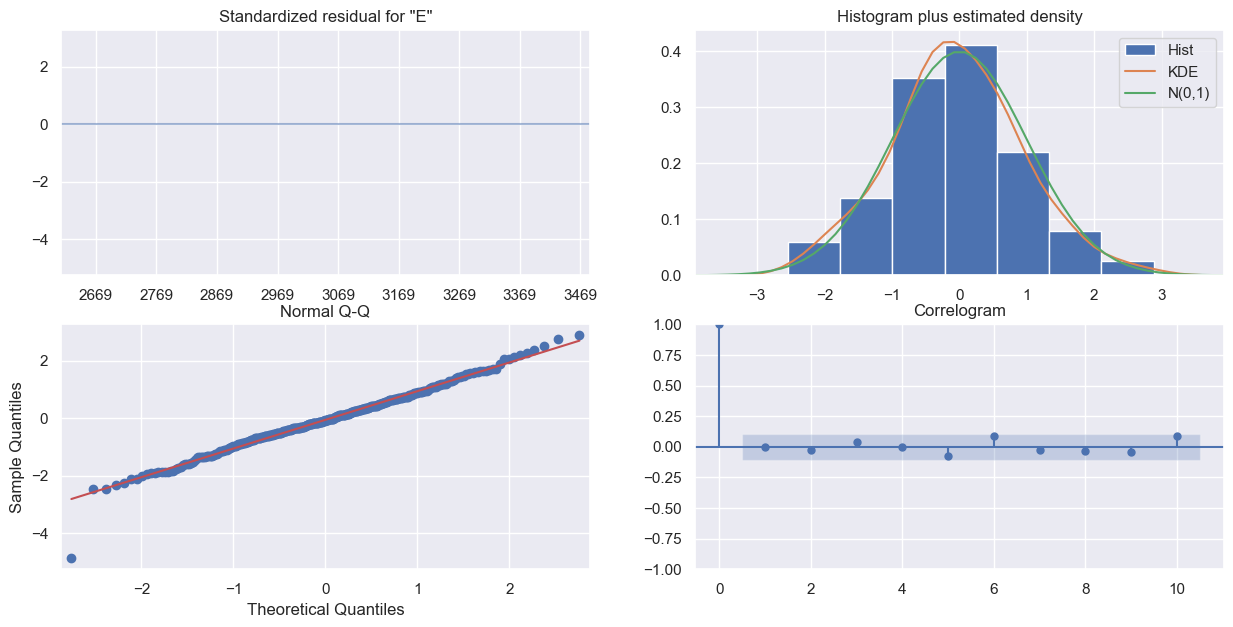

In [75]:
sarimax_model.plot_diagnostics(figsize=(15,7))
plt.show()

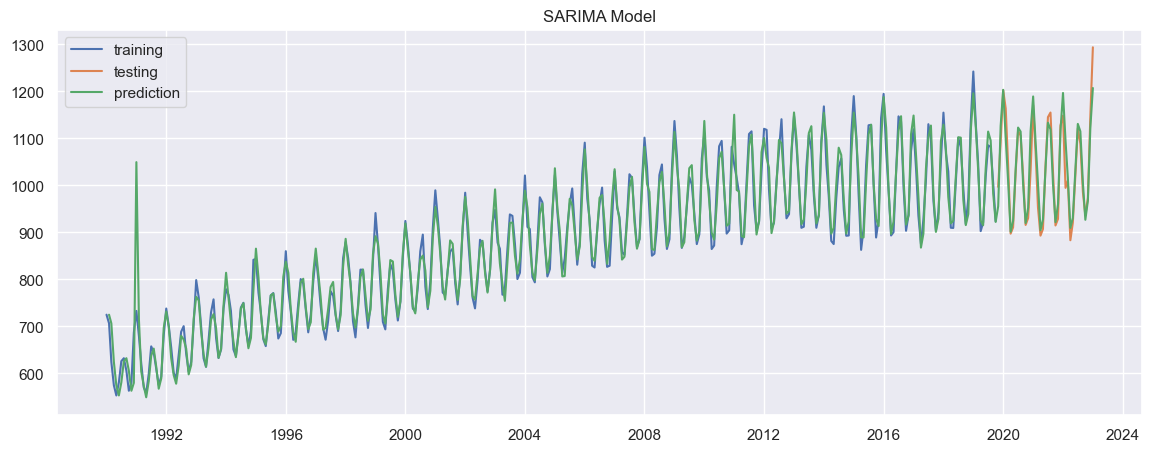

In [76]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(electricityTrain, label='training')
ax.plot(electricityTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [77]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(electricityTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(electricityTest, pred[pred.index>='2019-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 2.16%
Model Mean Absolute Percentage Error on testing data is 2.40%


## Electricity's AR(1) Model

In [78]:
from statsmodels.tsa.ar_model import AutoReg
arModel = AutoReg(electricityTrain,lags=1)
arModelFit = arModel.fit()
print(arModelFit.summary())

                                  AutoReg Model Results                                  
Dep. Variable:     Electricity Consumption (MWh)   No. Observations:                  358
Model:                                AutoReg(1)   Log Likelihood               -2035.032
Method:                          Conditional MLE   S.D. of innovations             72.344
Date:                           Thu, 10 Aug 2023   AIC                           4076.064
Time:                                   22:50:46   BIC                           4087.697
Sample:                               02-01-1990   HQIC                          4080.691
                                    - 10-01-2019                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              109.5366     22.561      4.855      0.000  

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


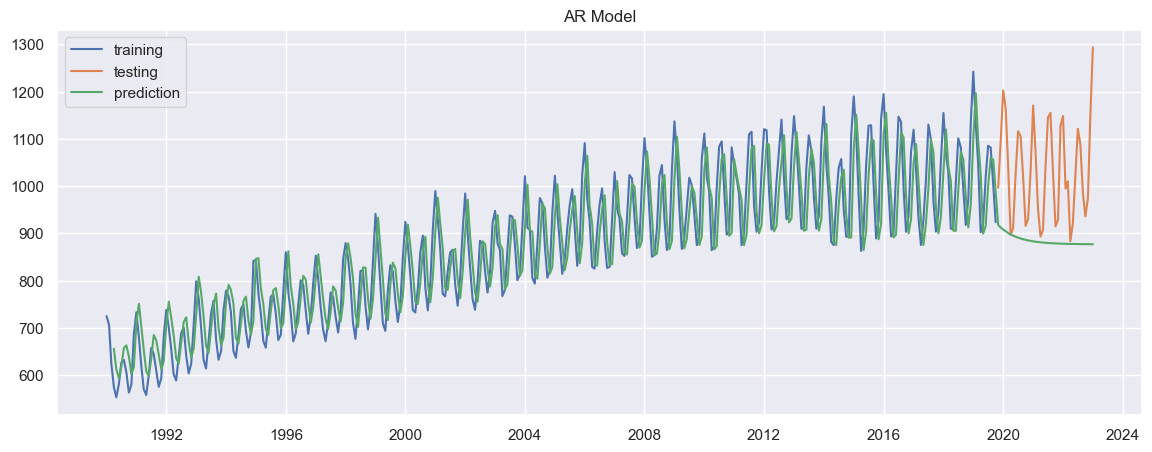

In [79]:
pred = arModelFit.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[3:] #Remove First 3 NaN Values
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(electricityTrain, label='training')
ax.plot(electricityTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('AR Model')
plt.show()

In [80]:
# To evaluate the AR model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(electricityTrain[3:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(electricityTest, pred[pred.index>='2019-11'])
rmse_train = np.sqrt(mean_absolute_percentage_error(electricityTrain[3:], pred[pred.index<'2019-11']))
rmse_test = np.sqrt(mean_absolute_percentage_error(electricityTest, pred[pred.index>='2019-11']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print(f'RMSE on training data is {rmse_train:.2f}')
print(f'RMSE on testing data is {rmse_test:.2f}')

Model Mean Absolute Percentage Error on training data is 6.98%
Model Mean Absolute Percentage Error on testing data is 13.56%
RMSE on training data is 0.26
RMSE on testing data is 0.37


### Since SARIMA Model have the lowest AIC, BIC and MAPE, we will tune the SARIMAX Model to find its best order and seasonal order.

## For Loop To Find The Best Order For Electricity's Sarimax Model

In [151]:
p_values = range(1,4)
d_values = range(1,2)
q_values = range(1,4)
P_values = range(1,4)
D_values = range(1,2)
Q_values = range(1,4)
seasonality = [12]
bestMapeOrder = None
bestAICOrder= None
bestBICOrder = None
bestAIC = 100000000
bestMape = 10000000
bestBIC = 1000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in seasonality:
                            order=(p,d,q)
                            seasonalOrder=(P,D,Q,s)
                        try:
                            
                            model = SARIMAX(electricityTrain,order=order,seasonal_order=seasonalOrder).fit()
                            predictions = model.forecast(steps=len(electricityTest))
                            mape = mean_absolute_percentage_error(electricityTest, predictions)
                            
                            if(model.aic<bestAIC):
                                bestAIC = model.aic
                                bestAICOrder= f'({order},{seasonalOrder})'
                            if(model.bic<bestBIC):
                                bestBIC = model.bic
                                bestBICOrder= f'({order},{seasonalOrder})'
                            if(mape<bestMape):
                                bestMapeaic = model.aic
                                bestMape = mape
                                bestMapeOrder= f'({order},{seasonalOrder})'  
                            
                                
                        except Exception as e:
                            print(f'LU Decomposition Error: {order},{seasonalOrder}')
                            

print(f'Order for Best AIC:{bestAICOrder}')
print(f'Order for Best BIC:{bestBICOrder}')
print(f'Order for Best MAPE:{bestMapeOrder}')
                            
                            

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so 

Order for Best AIC:((3, 1, 3),(2, 1, 2, 12))
Order for Best BIC:((1, 1, 1),(2, 1, 1, 12))
Order for Best MAPE:((3, 1, 2),(3, 1, 2, 12))


### We will choose order (3,1,3),(2,1,2,12) for our SARIMAX which has the best AIC.

## Electricity Sarimax Model (After Improvement)

In [81]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(electricityTrain,order=(3,1,3),seasonal_order=(2,1,2,12)).fit()
sarimax_model.summary()

C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kieny\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:           Electricity Consumption (MWh)   No. Observations:                  358
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -1554.616
Date:                                 Thu, 10 Aug 2023   AIC                           3131.233
Time:                                         22:51:03   BIC                           3173.512
Sample:                                     01-01-1990   HQIC                          3148.070
                                          - 10-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1834      0.198     -5.992      0.000      -1.571      -0.796
ar.L2          0.1169      0.129      0.909      0.364      -0.135       0.369
ar.L3          0.3193      0.123      2.593      0.010       0.078       0.561
ma.L1          0.8059      0.174      4.624      0.000       0.464       1.148
ma.L2         -0.8720      0.043    -20.231      0.000      -0.956      -0.787
ma.L3         -0.7240      0.159     -4.542      0.000      -1.036      -0.412
ar.S.L12       0.5498      0.175      3.143      0.002       0.207       0.893
ar.S.L24      -0.2803      0.065     -4.282      0.000      -0.409      -0.152
ma.S.L12      -1.2989      0.182     -7.122      0.000      -1.656      -0.941
ma.S.L24       0.5286      0.147      3.605      0.000       0.241       0.816
sigma2       465.0290     30.781     15.108      0.000     404.699     525.359
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                31.00
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

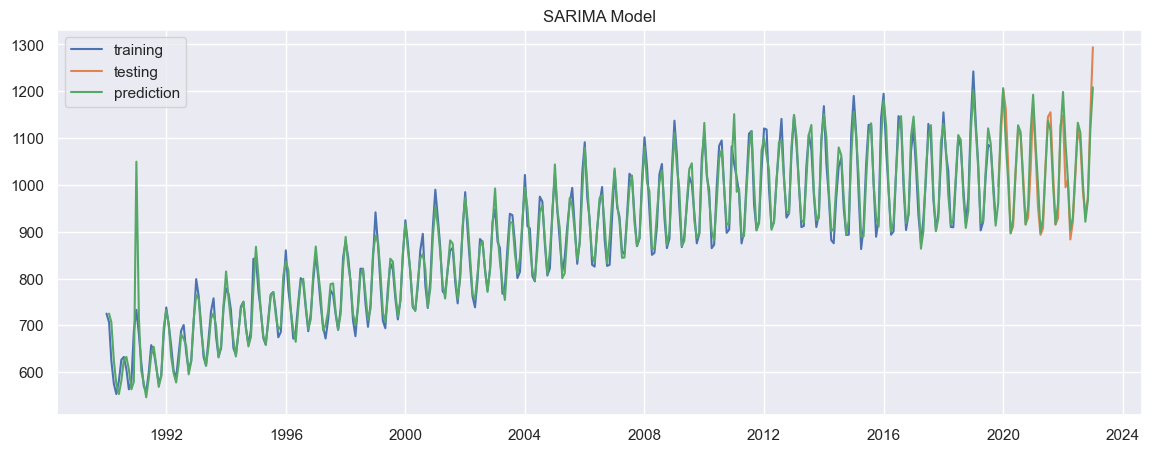

In [82]:
pred = sarimax_model.get_prediction(start='1990-01-01', end='2023-01-01').predicted_mean
pred = pred[1:]
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(electricityTrain, label='training')
ax.plot(electricityTest, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [83]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(electricityTrain[1:], pred[pred.index<'2019-11'])
mape_test = mean_absolute_percentage_error(electricityTest, pred[pred.index>='2019-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 2.14%
Model Mean Absolute Percentage Error on testing data is 2.31%


## Conclusion

## Final Model Chosen:<br><br>Gas Consumption: SARIMAX(1,1,1)x(1,1,1,12)<br><br>Water Consumption: SARIMAX(2,1,3)x(2,1,2,12)<br><br>Electricity Usage: SARIMAX(3,1,3)x(2,1,2,12)

### My electricity consumption forecast is the most accurate with the lowest MAPE score of 2.14% on training data and 2.31% on testing data. Compared to the exponential smoothing that was used as a baseline, my MAPE has decreased significantly which implies that my model is more accurate when forecasting.

### All in all, this time series project has allowed me to learn more in-depth about forecasting a time series and how forecasting is important for decision-makers to make the best decision.